In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('dataset_olympics.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [286]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

#### Statistical Summary of the Dataset


In [287]:
df.describe()

,ID,Age,Height,Weight,Year
count,35658.000000,33771.000000,26205.000000,25911.000000,35658.000000
mean,17829.500000,24.528886,176.406297,72.058945,1976.113242
std,10293.722286,5.814298,10.262062,14.434982,30.692181
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,8915.250000,21.000000,170.000000,62.000000,1956.000000
50%,17829.500000,23.000000,176.000000,71.000000,1984.000000
75%,26743.750000,27.000000,183.000000,80.000000,2000.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


#### Checking for Missing Values

In [5]:
df.isnull().mean()*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.902857
Height    23.220000
Weight    24.430000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.157143
dtype: float64

#### Checking for Duplicate Records

In [288]:
df.duplicated().sum()

np.int64(0)

#### Removing Duplicate Records

In [7]:
df.drop_duplicates(subset='ID',inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

#### Gender Representation in the Olympics

<Axes: xlabel='Sex'>

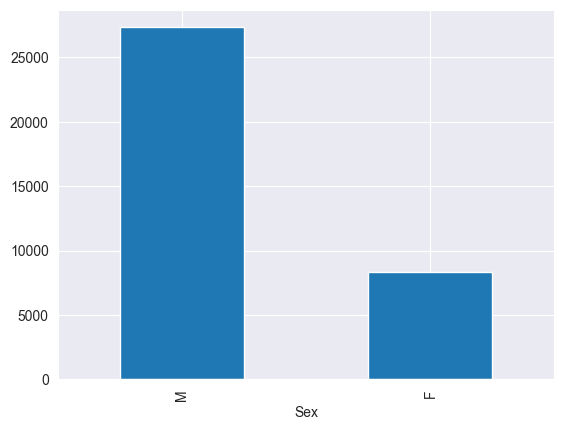

In [9]:
df['Sex'].value_counts().plot(kind='bar')

#### Athlete Age Distribution

Text(0, 0.5, 'Frequency')

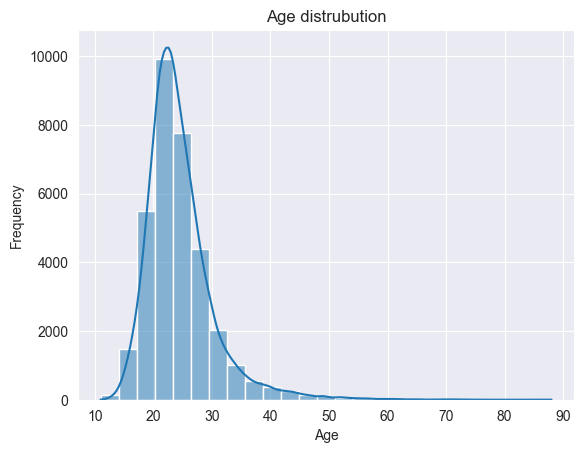

In [15]:
sns.histplot(data=df,x='Age',bins=25,kde=True)
plt.title('Age distrubution')
plt.xlabel('Age')
plt.ylabel('Frequency')

#### Athlete Height Distribution

Text(0, 0.5, 'Frequency')

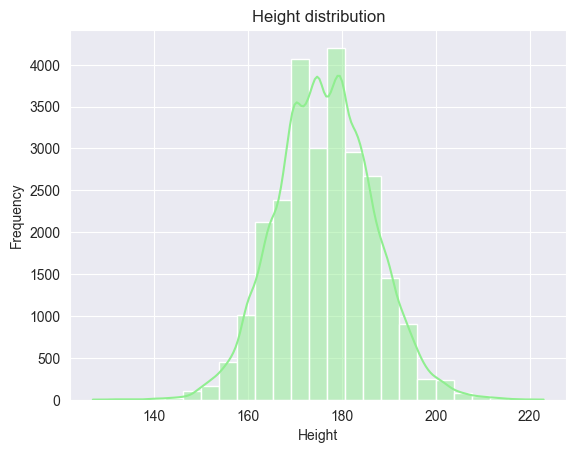

In [31]:
sns.histplot(data=df,x='Height',bins=25,kde=True,color='Green')
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

#### Athlete Weight Distribution

Text(0, 0.5, 'Frequency')

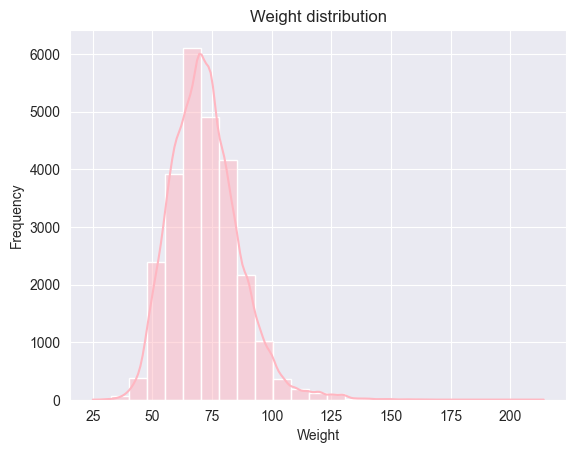

In [33]:
sns.histplot(data=df,x='Weight',bins=25,kde=True,color='Pink')
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

#### Medal Distribution Over the Years

Text(0.5, 1.0, 'Medal distribution')

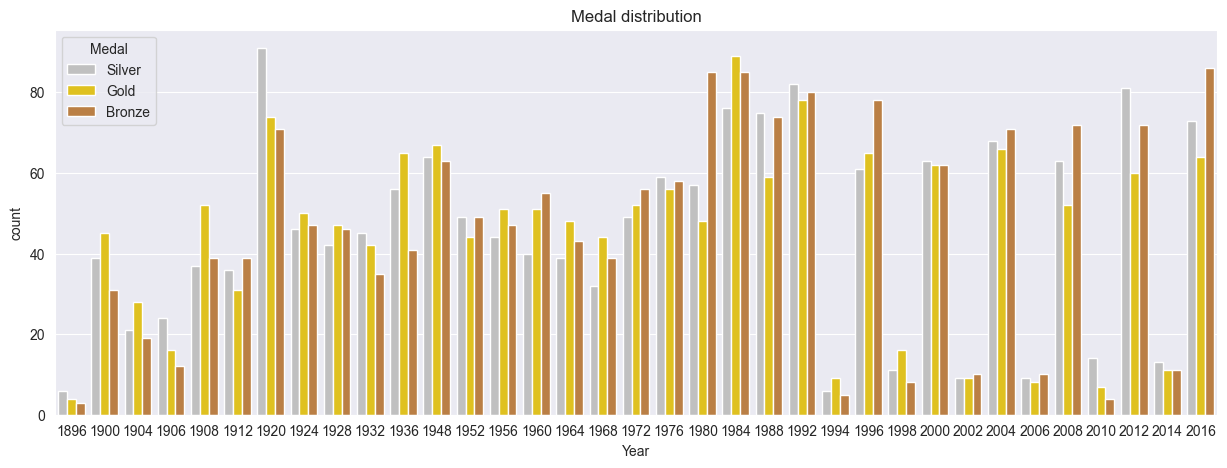

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Year',hue='Medal',palette=['Silver','gold','#CD7F32'])
plt.title('Medal distribution')
plt.xlabel('Year')
plt.title('Medal distribution')

#### Top 35 Teams Participating In 2016

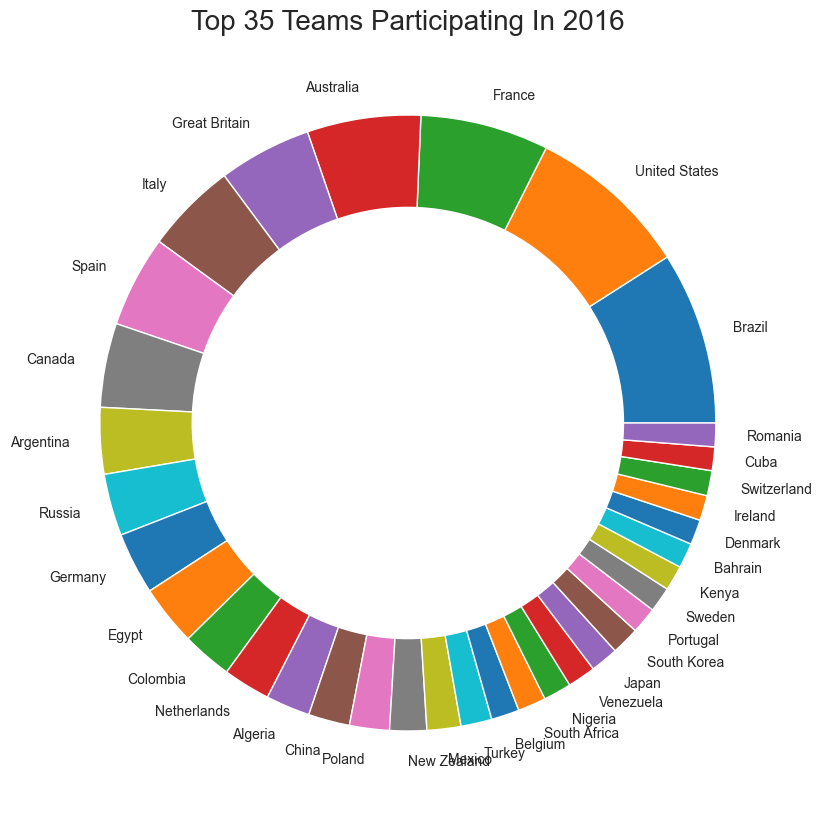

In [116]:
new_df=df[df['Year']==2016]
team_df=new_df.groupby('Team').size().sort_values(ascending=False)
team_counts=team_df.values
team_names=team_df.index
plt.rcParams['figure.figsize']=(22,10)
plt.pie(team_counts[:35],labels=team_names[:35])
plt.title('Top 35 Teams Participating In 2016',fontsize=20)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

#### Country v/s Gold Distribution

Text(0.5, 1.0, 'Country v/s Gold Distribution')

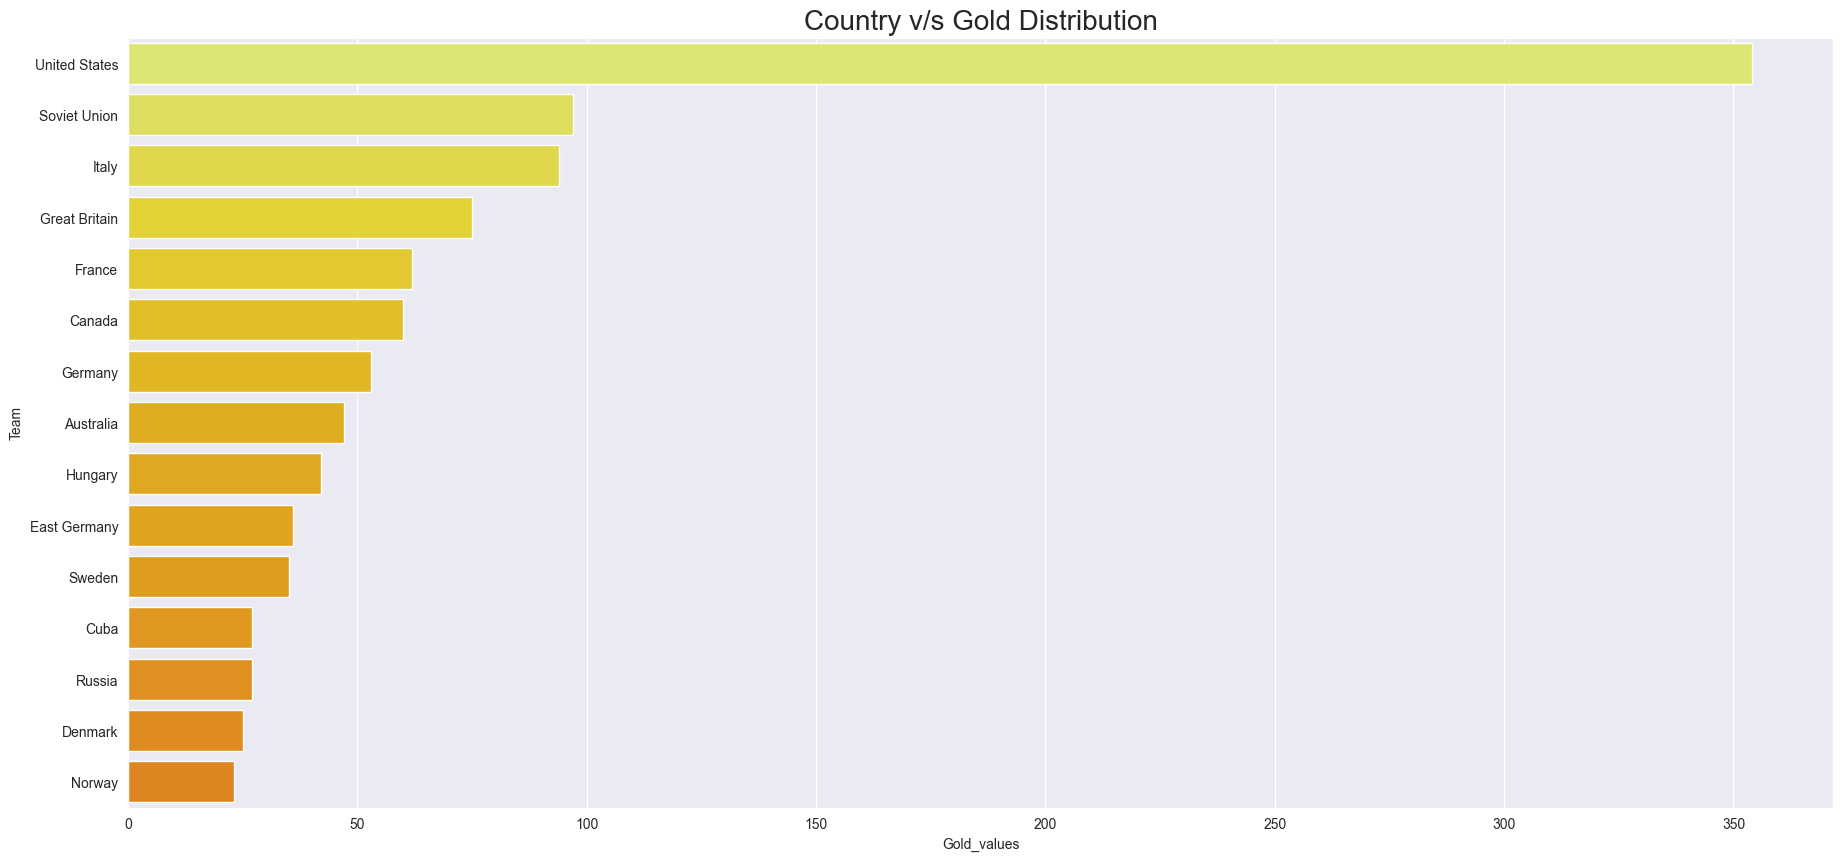

In [289]:
df_gold=df[df['Medal']=='Gold']
df_new_gold=df_gold.groupby(['Team']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Gold_values'})
sns.barplot(x='Gold_values',y='Team',data=df_new_gold[:15],palette='Wistia',hue='Team',dodge=False,          legend=False, )
plt.title('Gold distribution')
plt.title('Country v/s Gold Distribution',fontsize=20)

#### Athlete Height vs Weight by Medal Status

<Axes: xlabel='Height', ylabel='Weight'>

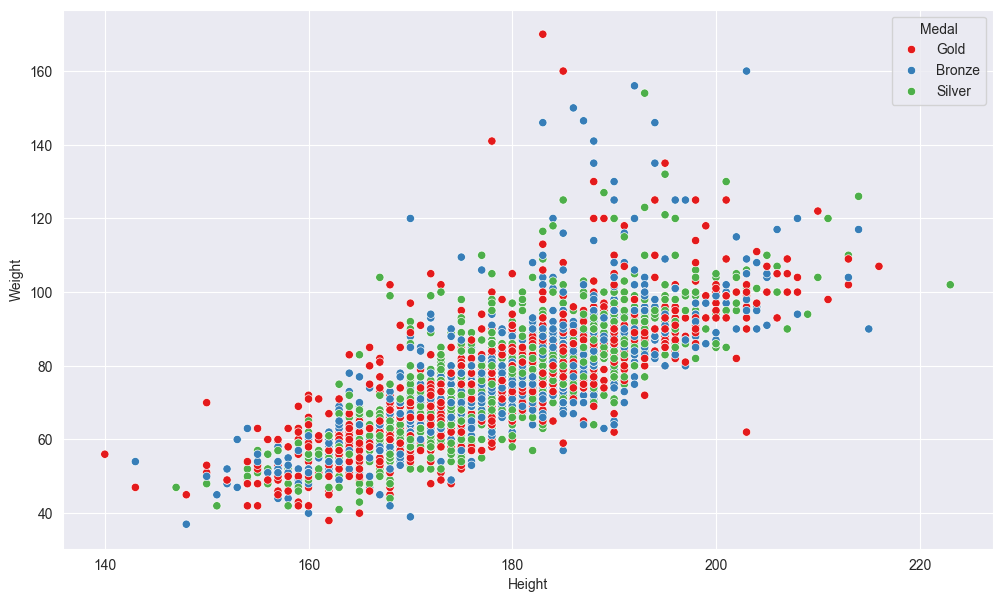

In [179]:
df_hw=df[['Height','Weight','Medal']]
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_hw,x='Height',y='Weight',hue='Medal',palette='Set1')

In [213]:
df_tall=df.sort_values(by='Height',ascending=False)
print('Tallest Athelete is :',df['Height'].max(),'cm')
print('Heaviest Athelete is :',df['Weight'].max(),'Kg')


Tallest Athelete is : 223.0 cm
Heaviest Athelete is : 214.0 Kg


In [248]:
df_sports=df.groupby('Sport')['Height'].median()
tallest_sport=df_sports[df_sports==df_sports.max()]
print("Sport(s) with the tallest athletes:\n", tallest_sport)

Sport(s) with the tallest athletes:
 Sport
Basketball    190.0
Name: Height, dtype: float64


In [250]:
shortest_sport=df_sports[df_sports==df_sports.min()]
print("Sport(s) with the shortest athletes:\n", shortest_sport)

Sport(s) with the shortest athletes:
 Sport
Gymnastics    163.0
Name: Height, dtype: float64


#### Average Weight by Sport and Gender

In [283]:
sport_gender_avg_weight=df.groupby(['Sport','Sex'])['Weight'].mean(numeric_only=True).sort_values(ascending=False)
print(sport_gender_avg_weight)

Sport                Sex
Tug-Of-War           M      92.900000
Rugby Sevens         M      90.555556
Basketball           M      90.482906
Bobsleigh            M      89.568376
Beach Volleyball     M      88.934783
                              ...    
Military Ski Patrol  M            NaN
Motorboating         M            NaN
Polo                 M            NaN
Racquets             M            NaN
Roque                M            NaN
Name: Weight, Length: 114, dtype: float64
